<h1>CS345 Lab 3

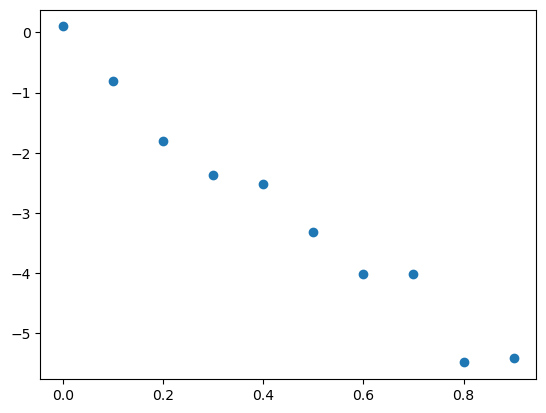

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

xvalues = np.load('x_values.npy')
yvalues = np.load('y_values.npy')
plt.scatter(xvalues, yvalues)
plt.show()

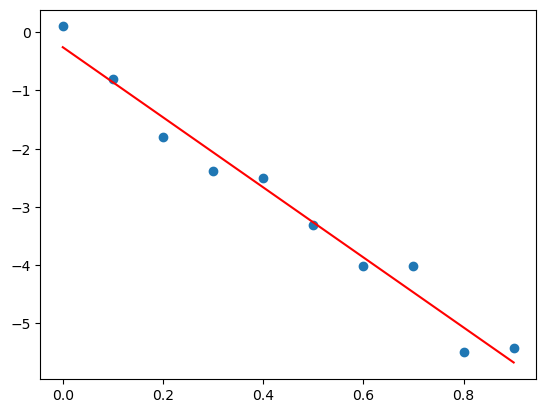

In [48]:
#create a linear regression model
regr = LinearRegression()
regr.fit(xvalues, yvalues)
plt.scatter(xvalues, yvalues)
plt.plot(xvalues, regr.predict(xvalues.reshape(-1,1)), color='red')
plt.show()


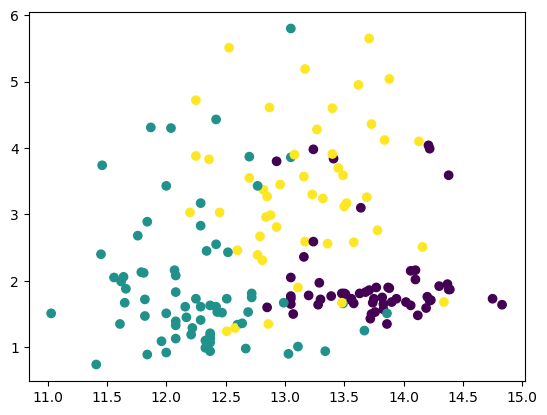

In [49]:
wineData = np.load('wineData.npy')
wineLabels = np.load('wineLabels.npy')
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

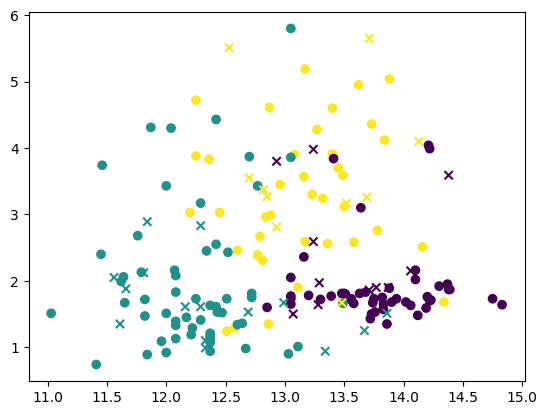

In [50]:
#split the data into training and testing sets
wine_train, wine_test, l_train, l_test = train_test_split(wineData, wineLabels, test_size=0.2)
plt.scatter(wine_train[:,0], wine_train[:,1], c=l_train)
#scatter the test data as x's
plt.scatter(wine_test[:,0], wine_test[:,1], c=l_test, marker='x')

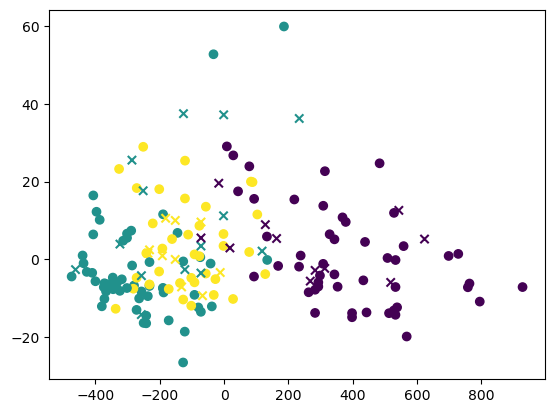

In [51]:
pca = sk.decomposition.PCA(n_components=2)
pca.fit(wine_train)
wine_train_transformed = pca.transform(wine_train)
wine_test_transformed = pca.transform(wine_test)
plt.scatter(wine_train_transformed[:,0], wine_train_transformed[:,1], c=l_train)
plt.scatter(wine_test_transformed[:,0], wine_test_transformed[:,1], c=l_test, marker='x')
plt.show()

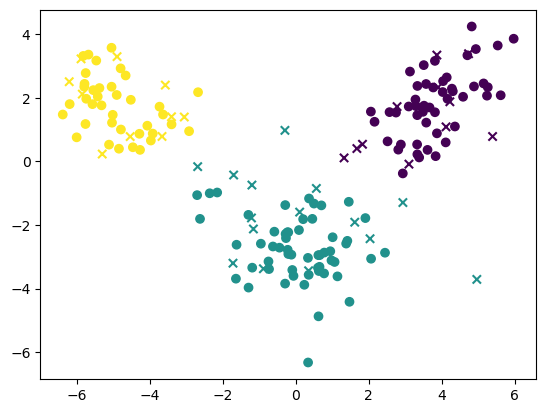

In [52]:
#creat a linear discriminant analysis model which only keeps the first 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_train, l_train)
#transform the data
wine_train_transformed = lda.transform(wine_train)
wine_test_transformed = lda.transform(wine_test)
plt.scatter(wine_train_transformed[:,0], wine_train_transformed[:,1], c=l_train)
plt.scatter(wine_test_transformed[:,0], wine_test_transformed[:,1], c=l_test, marker='x')
plt.show()


pca reduces the data into its principle components which makes it easier too see variations in the data, and is unsupervised

lda takes class labels into account which makes it supervised

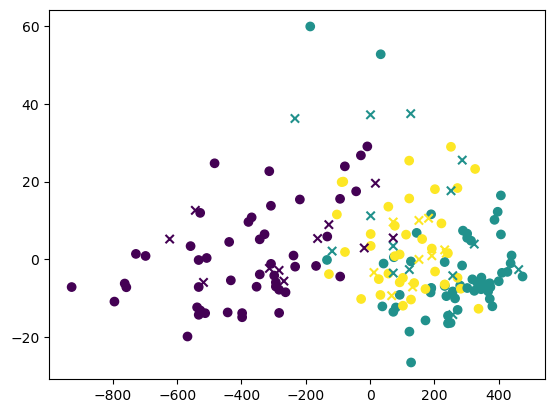

In [53]:
#mean center the training data
wine_train_mean = np.mean(wine_train, axis=0)
wine_train_centered = wine_train - wine_train_mean
#calculate the single value decomposition
u, s, vh = np.linalg.svd(wine_train_centered)
#project the data into a 2 dimensional principle component space
wine_train_transformed = np.matmul(wine_train_centered, vh.T[:,:2])
wine_test_transformed = np.matmul(wine_test - wine_train_mean, vh.T[:,:2])
plt.scatter(wine_train_transformed[:,0], wine_train_transformed[:,1], c=l_train)
plt.scatter(wine_test_transformed[:,0], wine_test_transformed[:,1], c=l_test, marker='x')
plt.show()


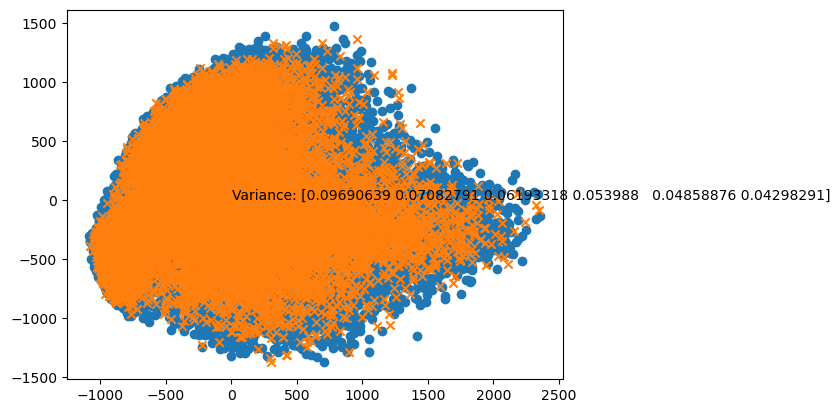

In [63]:
taskdata = np.load('task3_5_data.npy')
tasklabels = np.load('task3_5_labels.npy')
#split data into training and testing sets
task_train, task_test, label_train, label_test = train_test_split(taskdata, tasklabels, test_size=0.2)

pca = sk.decomposition.PCA(n_components=6)
pca.fit(task_train)
task_train_transformed = pca.transform(task_train)
task_test_transformed = pca.transform(task_test)
plt.scatter(task_train_transformed[:,0], task_train_transformed[:,1])
plt.scatter(task_test_transformed[:,0], task_test_transformed[:,1], marker='x')
#calculate the variance
variance = pca.explained_variance_ratio_    
plt.text(0.5, 0.5, 'Variance: ' + str(variance))
plt.show()

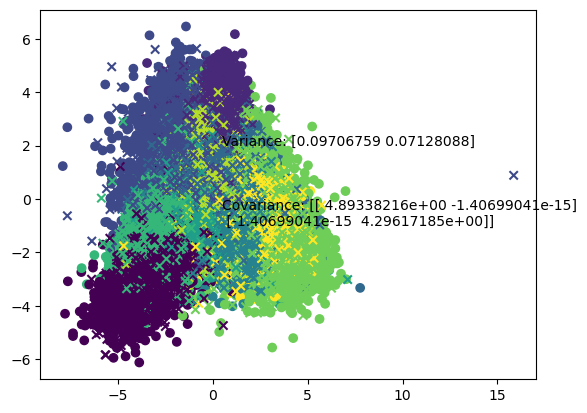

In [55]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(task_train, label_train)
#transform the data
task_train_transformed = lda.transform(task_train)
task_test_transformed = lda.transform(task_test)
plt.scatter(task_train_transformed[:,0], task_train_transformed[:,1], c=label_train)
plt.scatter(task_test_transformed[:,0], task_test_transformed[:,1], c=label_test, marker='x')
variance = pca.explained_variance_ratio_    
plt.text(0.5, 2, 'Variance: ' + str(variance))
#calculate the covariance
covariance = np.cov(task_train_transformed.T)
plt.text(0.5, -1, 'Covariance: ' + str(covariance))
plt.show()